In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

In [2]:
# Read the data into dataframe
df = pd.read_excel("Healthcare_dataset.xlsx")

In [12]:
print(df.isna().sum())
print(df.duplicated().sum())

Persistency_Flag        0
Race                    0
Ethnicity               0
Region                  0
Age_Bucket              0
                       ..
Risk_Immobilization     0
Risk_Recurring_Falls    0
Risk_Level              0
Dexa_Freq_Level         0
Gender_encoded          0
Length: 66, dtype: int64
11


## Visualize the distribution of the numerical columns

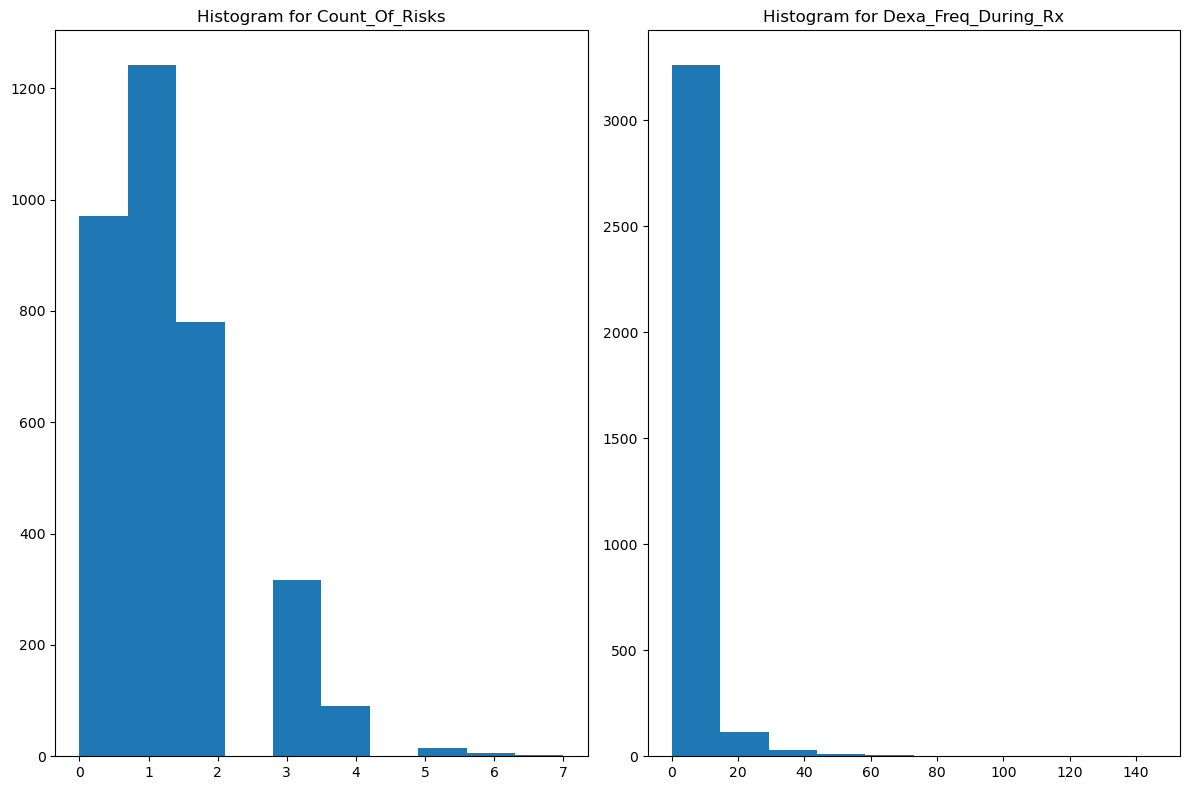

In [3]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Boxplot for Numeric Columns

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



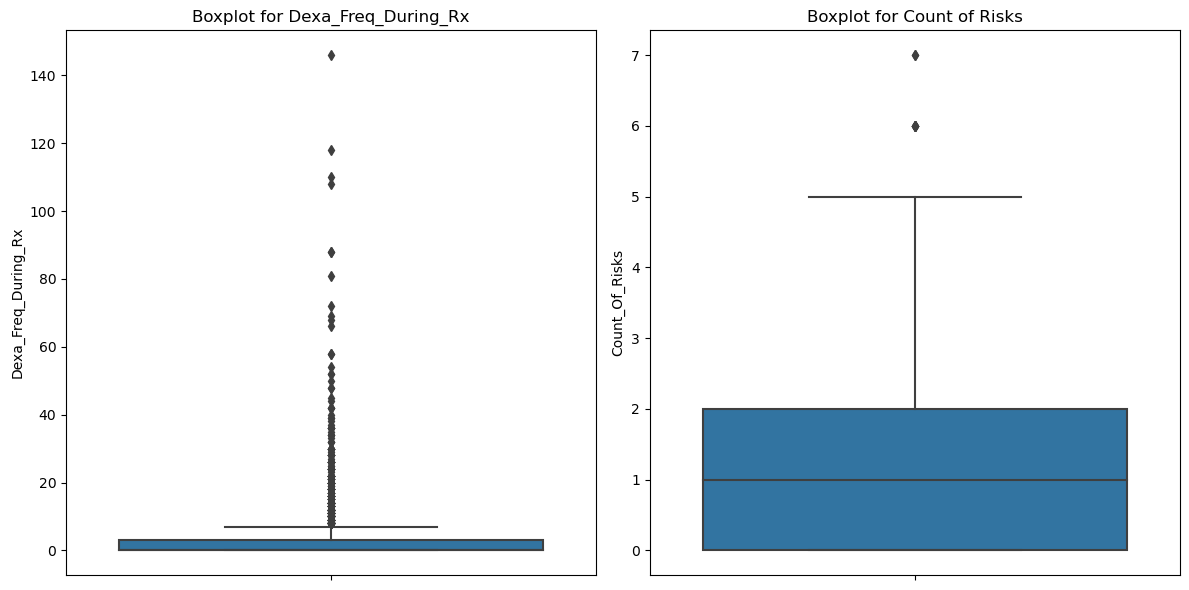

In [4]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Dexa_Freq_Level'
sns.boxplot(y=df['Dexa_Freq_During_Rx'], ax=axes[0])
axes[0].set_title('Boxplot for Dexa_Freq_During_Rx')
axes[0].set_ylabel('Dexa_Freq_During_Rx')

# Boxplot for 'Risk_Level'
sns.boxplot(y=df['Count_Of_Risks'], ax=axes[1])
axes[1].set_title('Boxplot for Count of Risks')
axes[1].set_ylabel('Count_Of_Risks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Handling Outliers

Box-Cox Transformation was used instead of removing the outliers considering the size of the dataset

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Figure size 1200x500 with 0 Axes>

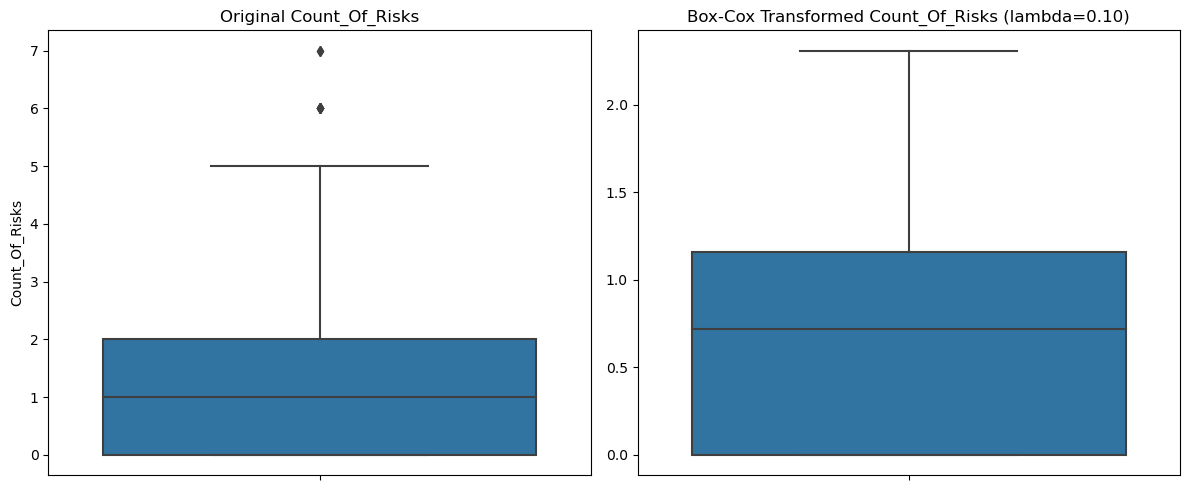

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



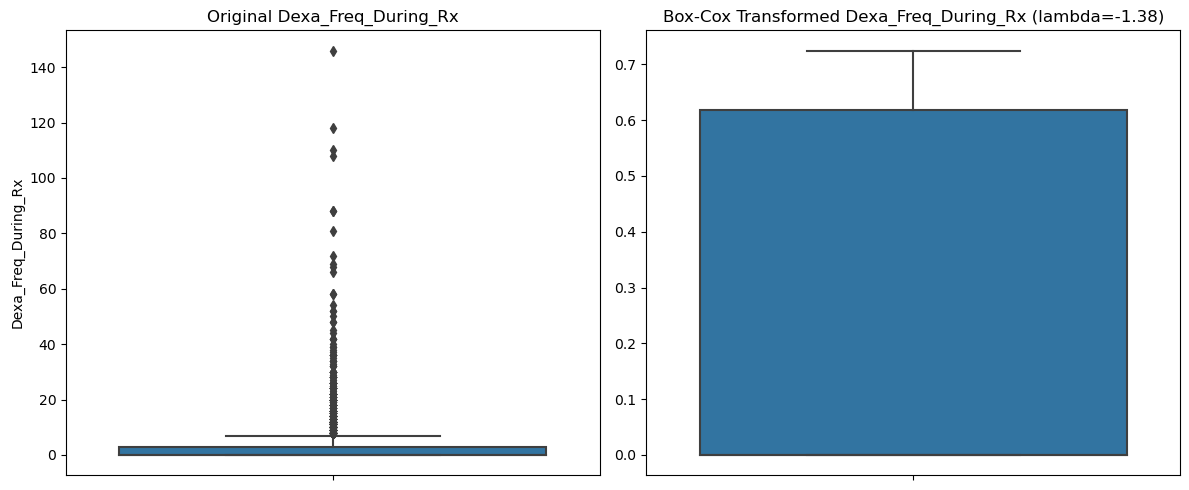

In [5]:
original_count_of_risks = df['Count_Of_Risks']
original_dexa_freq_during_rx = df['Dexa_Freq_During_Rx']


# Adding a constant to make 'Count_Of_Risks' values positive
constant_value_count_of_risks = 1
positive_count_of_risks = original_count_of_risks + constant_value_count_of_risks

# Applying the Box-Cox transformation for 'Count_Of_Risks'
transformed_count_of_risks, lambda_count_of_risks = boxcox(positive_count_of_risks)

# Adding a constant to make 'Dexa_Freq_During_Rx' values positive
constant_value_dexa_freq_during_rx = 1  # Addin 1 to all values to make it greater than zero
positive_dexa_freq_during_rx = original_dexa_freq_during_rx + constant_value_dexa_freq_during_rx

# Applying the Box-Cox transformation for 'Dexa_Freq_During_Rx'
transformed_dexa_freq_during_rx, lambda_dexa_freq_during_rx = boxcox(positive_dexa_freq_during_rx)

# Plotting the original and transformed data for 'Count_Of_Risks'
plt.figure(figsize=(12, 5))

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Count_Of_Risks'
sns.boxplot(y=original_count_of_risks, ax=axes[0])
axes[0].set_title('Original Count_Of_Risks')

sns.boxplot(y=transformed_count_of_risks, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Count_Of_Risks (lambda={lambda_count_of_risks:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Dexa_Freq_During_Rx'
sns.boxplot(y=original_dexa_freq_during_rx, ax=axes[0])
axes[0].set_title('Original Dexa_Freq_During_Rx')

sns.boxplot(y=transformed_dexa_freq_during_rx, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Dexa_Freq_During_Rx (lambda={lambda_dexa_freq_during_rx:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
# Print Lambda Function
print(f'Count of Risks estimated lambda function: {lambda_count_of_risks}')
print(f'Dexa Freq During Rx estimated lambda function: {lambda_dexa_freq_during_rx}')

Count of Risks estimated lambda function: 0.09947523122712457
Dexa Freq During Rx estimated lambda function: -1.3784802096724922


In [7]:
# Replace the original column with the transformed

df['Count_Of_Risks'] = transformed_count_of_risks
df['Dexa_Freq_During_Rx'] = transformed_dexa_freq_during_rx

## Data Cleaning and Preprocessing

Dropping'Ntm_Speciality' and 'Ntm_Speciality_Bucket' considering 'Ntm_Specialist_Flag' to be sufficient

     Persistency_Flag  Gender           Race     Ethnicity   Region  \
0          Persistent    Male      Caucasian  Not Hispanic     West   
1      Non-Persistent    Male          Asian  Not Hispanic     West   
2      Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3      Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4      Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...               ...     ...            ...           ...      ...   
3419       Persistent  Female      Caucasian  Not Hispanic    South   
3420       Persistent  Female      Caucasian  Not Hispanic    South   
3421       Persistent  Female      Caucasian  Not Hispanic    South   
3422   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket Ntm_Specialist_Flag Gluco_Record_Prior_Ntm  \
0           >75              Others                      N   
1         55-65        

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

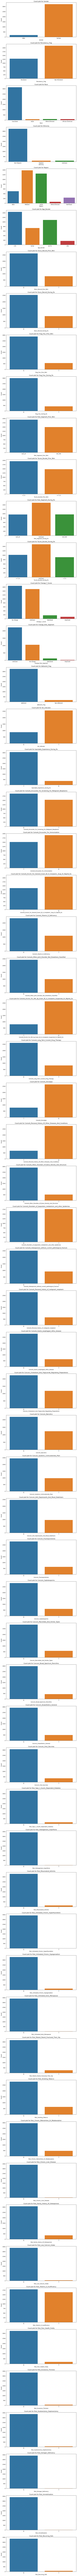

In [8]:
# Dropping redundant columns
df = df.drop(['Ptid', 'Ntm_Speciality', 'Ntm_Speciality_Bucket'], axis=1)

# Binning for 'Count_Of_Risks'
bins_count_of_risks = [0, 1, 2, 3, 4, float('inf')]
labels_count_of_risks = [0, 1, 2, 3, '>3']

df['Risk_Level'] = pd.cut(df['Count_Of_Risks'], bins=bins_count_of_risks, labels=labels_count_of_risks, right=False)
df = df.drop('Count_Of_Risks', axis=1)

# Binning for 'Dexa_Freq_During_Rx'
bins_dexa = [0, 6, 12, 18, 24, 30, float('inf')]
labels_dexa = [0, 6, 12, 18, 24, '>30']

df['Dexa_Freq_Level'] = pd.cut(df['Dexa_Freq_During_Rx'], bins=bins_dexa, labels=labels_dexa, right=False)
df = df.drop('Dexa_Freq_During_Rx', axis=1)

# Display the result
print(df)
# Create a list of columns to plot
columns_to_plot = ['Gender','Persistency_Flag', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
                    'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
                    'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
                    'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
                    'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
                    'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
                    'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease',
                    'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
                    'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types',
                    'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes',
                    'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism',
                    'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
                    'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake',
                    'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
                    'Risk_Immobilization', 'Risk_Recurring_Falls']

# Set up subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5 * len(columns_to_plot)))
fig.tight_layout(pad=4.0)

# Plot count plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Count plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Show the plots
plt.show()


## Encoding Categorical Featuters

### Using:
1.  SkLearn LabelEncoding for Gender
2.  Frequency encoding for other categorical columns

In [10]:
# Creating LabelEncoder instance
lb = LabelEncoder()

# Label encode the 'Gender' column
df['Gender_encoded'] = lb.fit_transform(df['Gender'])

# Drop the original 'Gender' column
df = df.drop('Gender', axis=1)

# Create a new DataFrame for frequency encoding
encoded_df = pd.DataFrame()

# Loop through other columns
for column in df.columns:
    if column not in['Gender', 'Count_Of_Risks', 'Dexa_Freq_During_Rx']:  # Exclude the already encoded Gender and other numeric columns
        # Perform frequency encoding
        encoding_map = df[column].value_counts().to_dict()
        encoded_df[column] = df[column].map(encoding_map)

encoded_df['Gender'] = df['Gender_encoded']

# Display the result
print(encoded_df)

      Persistency_Flag  Race  Ethnicity  Region  Age_Bucket  \
0                 1289  3148       3235     502        1439   
1                 2135    84       3235     502         733   
2                 2135    97         98    1383        1086   
3                 2135  3148       3235    1383        1439   
4                 2135  3148       3235    1383        1439   
...                ...   ...        ...     ...         ...   
3419              1289  3148       3235    1247        1439   
3420              1289  3148       3235    1247        1439   
3421              1289  3148       3235    1247        1439   
3422              2135  3148       3235    1247         733   
3423              2135  3148       3235    1247        1086   

      Ntm_Specialist_Flag  Gluco_Record_Prior_Ntm  Gluco_Record_During_Rx  \
0                    2013                    2619                    2522   
1                    2013                    2619                    2522   
2           